### Importing the requires modules

In [1052]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
import pickle

### Importing the dataset

In [864]:
laptop_data=pd.read_csv('laptop_data.csv')

In [865]:
laptop_data

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu Brand,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Other Intel Processor,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


### Exploring the Data

In [866]:
laptop_data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu Brand,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [867]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu Brand         1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [868]:
laptop_data.duplicated().sum()

0

In [869]:
laptop_data.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu Brand           0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

### Feature Engineering

Removing the unwanted columns

In [870]:
 laptop_data.drop(columns=['Unnamed: 0'], inplace=True)

In [871]:
laptop_data.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu Brand,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832


Converting the Ram Column to int

In [872]:
laptop_data['Ram']=laptop_data['Ram'].str.replace('GB','')

In [873]:
laptop_data['Ram']=laptop_data['Ram'].astype('int32')

In [874]:
laptop_data.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu Brand,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832


In [875]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu Brand         1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), int32(1), object(8)
memory usage: 107.0+ KB


Converting the Weight Column to int

In [876]:
laptop_data['Weight']=laptop_data['Weight'].str.replace('kg','')

In [877]:
laptop_data.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu Brand,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832


In [878]:
laptop_data['Weight']=laptop_data['Weight'].astype('float32')

In [879]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu Brand         1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


Extracting the TouchScreen Laptops

In [880]:
laptop_data['TouchScreen']=laptop_data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [881]:
laptop_data.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu Brand,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
579,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7,8,256GB SSD,AMD Radeon R5 M430,Linux,2.20,39907.2528,0
254,Acer,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i3,4,256GB SSD,Nvidia GeForce MX130,Windows 10,3.00,37402.5600,0
1007,HP,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.43,77202.7200,0
1218,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.60,67772.1600,0
1248,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,No OS,2.30,30529.4400,0


Extracting the IPS screen Laptops

In [882]:
laptop_data['IPS']=laptop_data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [883]:
laptop_data.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu Brand,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
978,HP,Notebook,15.6,1366x768,Intel Core i7,6,1TB HDD,Intel HD Graphics 620,Windows 10,2.04,30849.12,0,0
161,Acer,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5,4,256GB SSD,Nvidia GeForce MX150,Windows 10,3.00,42890.40,0,1
744,Lenovo,Workstation,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7,16,1TB SSD,Nvidia Quadro M520M,Windows 10,2.50,175770.72,0,1
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72,1,1
810,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7,12,1TB HDD,AMD Radeon RX 580,Windows 10,3.74,93186.72,0,1


Extracting the resoultion and converting it to PPI

In [884]:
new=laptop_data['ScreenResolution'].str.split('x',n=1,expand=True)

In [885]:
laptop_data['X_res']=new[0]
laptop_data['Y_res']=new[1]

In [886]:
laptop_data.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu Brand,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [887]:
laptop_data['X_res']=laptop_data['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [888]:
laptop_data.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu Brand,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [889]:
laptop_data['X_res']=laptop_data['X_res'].astype('int')
laptop_data['Y_res']=laptop_data['Y_res'].astype('int')

In [890]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu Brand         1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [891]:
laptop_data['ppi'] = (((laptop_data['X_res']**2) + (laptop_data['Y_res']**2))**0.5/laptop_data['Inches']).astype('float')

In [892]:
laptop_data['ppi'] 

0       226.983005
1       127.677940
2       141.211998
3       220.534624
4       226.983005
           ...    
1298    157.350512
1299    276.053530
1300    111.935204
1301    100.454670
1302    100.454670
Name: ppi, Length: 1303, dtype: float64

Extracting the data from Memory column

In [893]:
laptop_data['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [894]:
laptop_data['Memory'] = laptop_data['Memory'].astype(str).replace('\.0', '', regex=True)
laptop_data["Memory"] = laptop_data["Memory"].str.replace('GB', '')
laptop_data["Memory"] = laptop_data["Memory"].str.replace('TB', '000')
new = laptop_data["Memory"].str.split("+", n = 1, expand = True)

laptop_data["first"]= new[0]
laptop_data["first"]=laptop_data["first"].str.strip()

laptop_data["second"]= new[1]

laptop_data["Layer1HDD"] = laptop_data["first"].apply(lambda x: 1 if "HDD" in x else 0)
laptop_data["Layer1SSD"] = laptop_data["first"].apply(lambda x: 1 if "SSD" in x else 0)
laptop_data["Layer1Hybrid"] = laptop_data["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop_data["Layer1Flash_Storage"] = laptop_data["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

laptop_data['first'] = laptop_data['first'].str.replace(r'\D', '')

laptop_data["second"].fillna("0", inplace = True)

laptop_data["Layer2HDD"] = laptop_data["second"].apply(lambda x: 1 if "HDD" in x else 0)
laptop_data["Layer2SSD"] = laptop_data["second"].apply(lambda x: 1 if "SSD" in x else 0)
laptop_data["Layer2Hybrid"] = laptop_data["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop_data["Layer2Flash_Storage"] = laptop_data["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

laptop_data['second'] = laptop_data['second'].str.replace(r'\D', '')

laptop_data["first"] = laptop_data["first"].astype(int)
laptop_data["second"] = laptop_data["second"].astype(int)

laptop_data["HDD"]=(laptop_data["first"]*laptop_data["Layer1HDD"]+laptop_data["second"]*laptop_data["Layer2HDD"])
laptop_data["SSD"]=(laptop_data["first"]*laptop_data["Layer1SSD"]+laptop_data["second"]*laptop_data["Layer2SSD"])
laptop_data["Hybrid"]=(laptop_data["first"]*laptop_data["Layer1Hybrid"]+laptop_data["second"]*laptop_data["Layer2Hybrid"])
laptop_data["Flash_Storage"]=(laptop_data["first"]*laptop_data["Layer1Flash_Storage"]+laptop_data["second"]*laptop_data["Layer2Flash_Storage"])

laptop_data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [895]:
laptop_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu Brand,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,ppi,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,0,128,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,0,0,0,128
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,0,256,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,0,512,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,0,256,0,0


In [896]:
laptop_data.corr()['Price']

Inches           0.068197
Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
IPS              0.252208
X_res            0.556529
Y_res            0.552809
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

Extracting the data from Gpu column

In [897]:
laptop_data['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [898]:
laptop_data['Gpu brand'] = laptop_data['Gpu'].apply(lambda x:x.split()[0])

In [899]:
laptop_data.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu Brand,Ram,Memory,Gpu,OpSys,Weight,...,TouchScreen,IPS,X_res,Y_res,ppi,HDD,SSD,Hybrid,Flash_Storage,Gpu brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,0,1,2560,1600,226.983005,0,128,0,0,Intel
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,0,0,1440,900,127.677940,0,0,0,128,Intel
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5,8,256 SSD,Intel HD Graphics 620,No OS,1.86,...,0,0,1920,1080,141.211998,0,256,0,0,Intel
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,...,0,1,2880,1800,220.534624,0,512,0,0,AMD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,0,1,2560,1600,226.983005,0,256,0,0,Intel


In [900]:
laptop_data['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [901]:
laptop_data = laptop_data[laptop_data['Gpu brand'] != 'ARM']

In [902]:
laptop_data['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

Extrating the Data from Operating System

In [903]:
laptop_data['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [904]:
def sort_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [905]:
laptop_data['Os']=laptop_data['OpSys'].apply(sort_os)

In [906]:
laptop_data['Os']

0                      Mac
1                      Mac
2       Others/No OS/Linux
3                      Mac
4                      Mac
               ...        
1298               Windows
1299               Windows
1300               Windows
1301               Windows
1302               Windows
Name: Os, Length: 1302, dtype: object

In [907]:
laptop_data.corr()

,Inches,Ram,Weight,Price,TouchScreen,IPS,X_res,Y_res,ppi,HDD,SSD,Hybrid,Flash_Storage
Inches,1.000000,0.237129,0.827397,0.067329,-0.359514,-0.112726,-0.069875,-0.092934,-0.413055,0.530468,-0.109364,0.054003,-0.228868
Ram,0.237129,1.000000,0.383362,0.742905,0.118875,0.207949,0.434095,0.426357,0.305688,0.095808,0.603379,0.038409,-0.059612
Weight,0.827397,0.383362,1.000000,0.209867,-0.293004,0.018643,-0.031866,-0.052041,-0.321883,0.514147,-0.063818,0.095122,-0.179165
Price,0.067329,0.742905,0.209867,1.000000,0.192917,0.253320,0.557369,0.554591,0.475368,-0.096891,0.670660,0.007942,-0.040067
TouchScreen,-0.359514,0.118875,-0.293004,0.192917,1.000000,0.148026,0.350097,0.355756,0.458571,-0.208766,0.257577,-0.039591,-0.020809
IPS,-0.112726,0.207949,0.018643,0.253320,0.148026,1.000000,0.280588,0.287404,0.299142,-0.093588,0.225311,-0.022505,0.068616
X_res,-0.069875,0.434095,-0.031866,0.557369,0.350097,0.280588,1.000000,0.994480,0.931478,-0.124872,0.528655,0.000222,-0.017177
Y_res,-0.092934,0.426357,-0.052041,0.554591,0.355756,0.287404,0.994480,1.000000,0.939197,-0.136141,0.521017,-0.001410,0.014996
ppi,-0.413055,0.305688,-0.321883,0.475368,0.458571,0.299142,0.931478,0.939197,1.000000,-0.294698,0.509437,-0.020095,0.076479
HDD,0.530468,0.095808,0.514147,-0.096891,-0.208766,-0.093588,-0.124872,-0.136141,-0.294698,1.000000,-0.400750,-0.076674,-0.117165


Removing the Unwanted Column

In [911]:
laptop_data.drop(columns=['ScreenResolution','X_res','Y_res','Inches','Memory','Flash_Storage','Hybrid','Gpu','OpSys'], inplace=True)

In [912]:
laptop_data.head(5)

,Company,TypeName,Cpu Brand,Ram,Weight,Price,TouchScreen,IPS,ppi,HDD,SSD,Gpu brand,Os
0,Apple,Ultrabook,Intel Core i5,8,1.37,71378.6832,0,1,226.983005,0,128,Intel,Mac
1,Apple,Ultrabook,Intel Core i5,8,1.34,47895.5232,0,0,127.677940,0,0,Intel,Mac
2,HP,Notebook,Intel Core i5,8,1.86,30636.0000,0,0,141.211998,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,Intel Core i7,16,1.83,135195.3360,0,1,220.534624,0,512,AMD,Mac
4,Apple,Ultrabook,Intel Core i5,8,1.37,96095.8080,0,1,226.983005,0,256,Intel,Mac


EDA of the Dataset

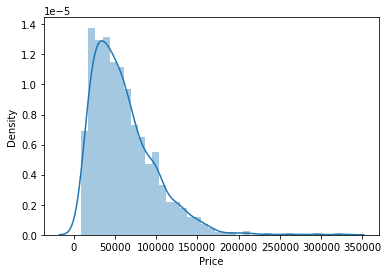

In [913]:
sns.distplot(laptop_data['Price'])
plt.show()

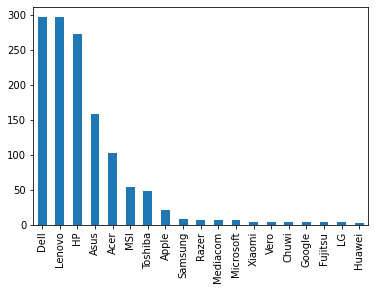

In [914]:
laptop_data['Company'].value_counts().plot(kind='bar')
plt.show()

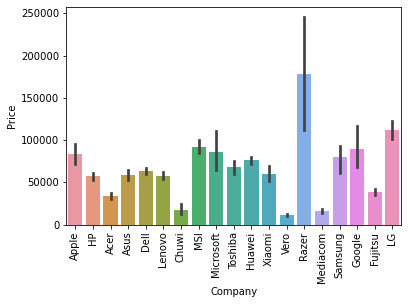

In [915]:
sns.barplot(x=laptop_data['Company'],y=laptop_data['Price'])
plt.xticks(rotation='vertical')
plt.show()

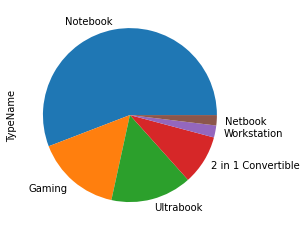

In [916]:
laptop_data['TypeName'].value_counts().plot(kind='pie')
plt.show()

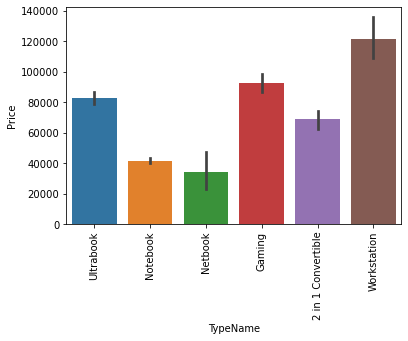

In [917]:
sns.barplot(x=laptop_data['TypeName'],y=laptop_data['Price'])
plt.xticks(rotation='vertical')
plt.show()

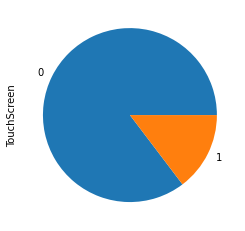

In [918]:
laptop_data['TouchScreen'].value_counts().plot(kind='pie')
plt.show()

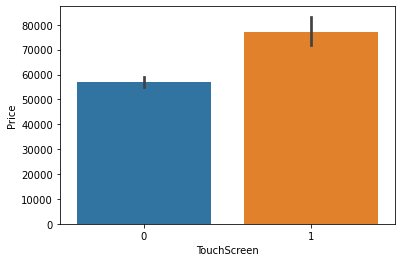

In [919]:
sns.barplot(x=laptop_data['TouchScreen'],y=laptop_data['Price'])
plt.show()

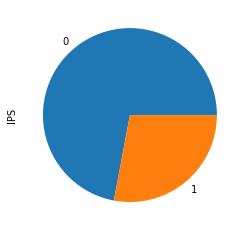

In [920]:
laptop_data['IPS'].value_counts().plot(kind='pie')
plt.show()

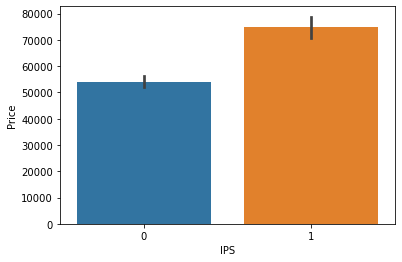

In [921]:
sns.barplot(x=laptop_data['IPS'],y=laptop_data['Price'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

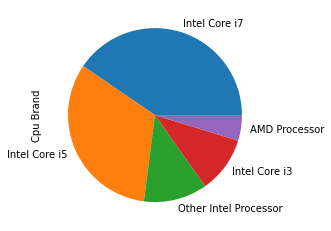

In [922]:
laptop_data['Cpu Brand'].value_counts().plot(kind='pie')
plt.show

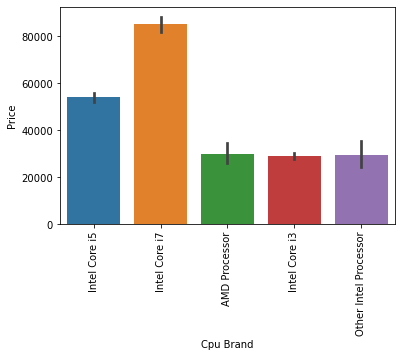

In [923]:
sns.barplot(x=laptop_data['Cpu Brand'],y=laptop_data['Price'])
plt.xticks(rotation='vertical')
plt.show()

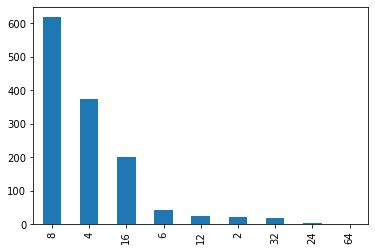

In [924]:
laptop_data['Ram'].value_counts().plot(kind='bar')
plt.show()

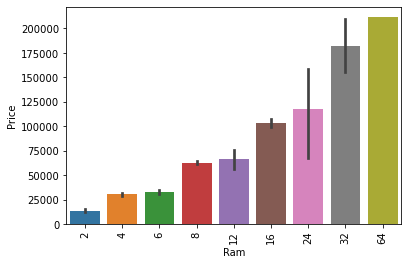

In [925]:
sns.barplot(x=laptop_data['Ram'],y=laptop_data['Price'])
plt.xticks(rotation='vertical')
plt.show()

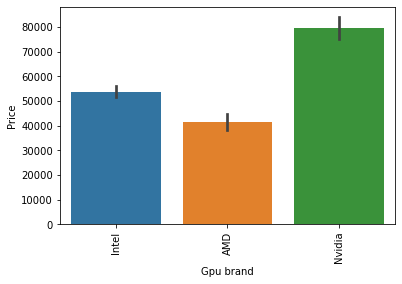

In [926]:
sns.barplot(x=laptop_data['Gpu brand'],y=laptop_data['Price'])
plt.xticks(rotation='vertical')
plt.show()

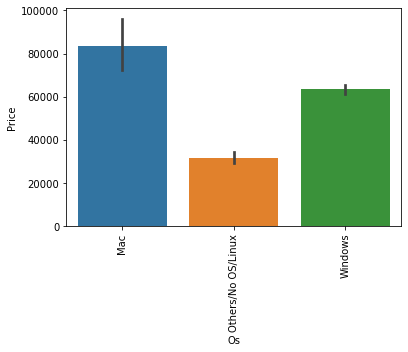

In [927]:
sns.barplot(x=laptop_data['Os'],y=laptop_data['Price'])
plt.xticks(rotation='vertical')
plt.show()

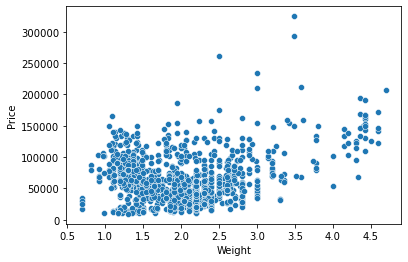

In [928]:
sns.scatterplot(x=laptop_data['Weight'],y=laptop_data['Price'])
plt.show()

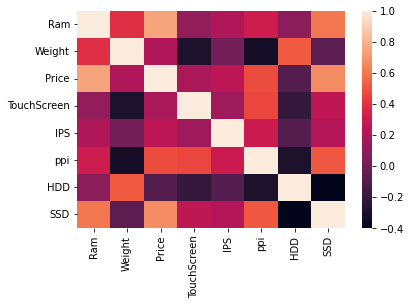

In [929]:
sns.heatmap(laptop_data.corr())
plt.show()

Training the Model

In [949]:
X = laptop_data.drop(columns=['Price'])
y = np.log(laptop_data['Price'])

In [950]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [941]:
laptop_data.head(1)

,Company,TypeName,Cpu Brand,Ram,Weight,Price,TouchScreen,IPS,ppi,HDD,SSD,Gpu brand,Os
0,Apple,Ultrabook,Intel Core i5,8,1.37,71378.6832,0,1,226.983005,0,128,Intel,Mac


Linear Regression

In [953]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score=',r2_score(y_test,y_pred))
print('MAE=',mean_absolute_error(y_test,y_pred))

R2 score= 0.8073277448418517
MAE= 0.21017827976429224


Ridge Regression

In [955]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.812733103131181
MAE 0.20926802242582954


Lasso Regression

In [956]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8071853945317105
MAE 0.21114361613472565


KNN

In [968]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8021984604448553
MAE 0.19319716721521116


Decision Tree

In [986]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8253383248188635
MAE 0.1888570771155987


SVM

In [997]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.813223779576549
MAE 0.20095305828125118


Random Forest

In [1011]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=11,
                              max_samples=0.8,
                              max_features=0.70,
                              max_depth=20)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8919237910732967
MAE 0.1542277548296622


ExtraTrees

In [1021]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              bootstrap=True,
                              max_samples=0.6,
                              max_features=0.70,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8928436124905096
MAE 0.1566008848144383


AdaBoost

In [1026]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=17,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7980999043622826
MAE 0.22838573054921432


Gradient Boost

In [1034]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=350)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8859619812656105
MAE 0.15943069345271388


XG Boost

In [1041]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=50,max_depth=5,learning_rate=0.4)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8915750214828964
MAE 0.15675078370964945


Voting Regressor

In [1048]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=100,random_state=11,max_samples=0.8,max_features=0.70,max_depth=20)

gbdt = GradientBoostingRegressor(n_estimators=350,max_features=0.5)

xgb = XGBRegressor(n_estimators=50,max_depth=5,learning_rate=0.4)

et = ExtraTreesRegressor(n_estimators=100,random_state=3,bootstrap=True,max_samples=0.6,max_features=0.70,max_depth=15)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8992862654936278
MAE 0.149573022795073


Stacking

In [1051]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8803433880256678
MAE 0.1675744588636907


Exporting

In [1053]:
pickle.dump(laptop_data,open('laptop_data.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))